# EMAIL SPAM DETECTION 

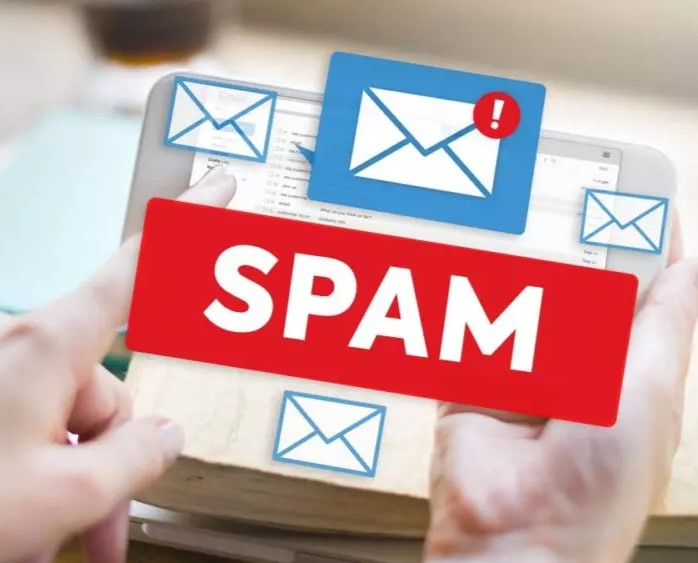

#### Problem Statement

Email has become an essential communication tool, but it's also susceptible to abuse through the distribution of spam emails. Spam emails are unsolicited and often contain malicious content, deceptive offers, or irrelevant information. These emails can clog up inboxes, waste user time, and potentially lead to security risks if recipients unknowingly engage with harmful content.



Develop an accurate email spam prediction system to classify incoming emails as spam or legitimate (ham). Using a labeled dataset of emails, build a model that analyzes email content, headers, and potential metadata to effectively distinguish between unwanted spam and genuine messages. The project's success will be determined by achieving a high-performance model, a real-time processing system, and a user-friendly interface if applicable.

In [156]:
# Here we have imported all necessory libraries .

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Imported libraries for text preprocessing

import nltk
from nltk.corpus import stopwords

import re
from nltk.stem import PorterStemmer

In [11]:
df=pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
# Short info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# Here we have a text dataset where "Message" is input feature and "Category" is output feature
# We have total 5572 records in dataset
# In output column It is classified into two classes 0 and 1 
# Based on total reviews we will build a model.

In [13]:
# We check the shape of data (rows, columns)

df.shape

(5572, 2)

In [ ]:
# Checked pulicates values or records :

In [14]:
df.duplicated().sum()

415

In [15]:
# Here we Got 412 Duplicate records which we can removed 

In [16]:
# We have checked Null/Missing values 

# No Null/Missing values are present in dataset.

In [17]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [19]:
# We have checked label data 

In [20]:
s1=df['Category'].value_counts()
s1

ham     4825
spam     747
Name: Category, dtype: int64

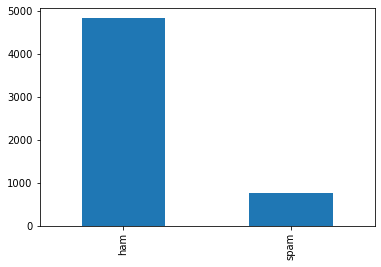

In [75]:
# Distribution of spam and ham

df['Category'].value_counts().plot(kind='bar')
plt.show()

In [22]:
# dataset is not balanced 
# For balancing variable we have SMOTE technique

In [32]:
# from imblearn.over_sampling import SMOTE

# sm=SMOTE(random_state=1)
# X_new, y_new = sm.fit_resample(X, y)

### TEXT PREPROCESSING

Preprocessing Dataset Each review undergoes through a preprocessing step, where all the vague information is removed.
Removing the Stopwords, numeric and speacial charecters. Normalizing each review using the approach of stemming.

In [35]:
# Imported libraries for text preprocessing

import nltk
from nltk.corpus import stopwords

import re
from nltk.stem import PorterStemmer

In [39]:
# Here is total english stopwords

words=stopwords.words('english')   
words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
# There are total 179

len(words)

179

In [48]:
# We well follow next step for TEXT PREPROCESING

# remove special characters/digit
# remove stopwords(most repeated-a,an, the )
# stemming (love,lovable,loved etc)

In [57]:
corpus=[]

for i in range(len(df)):
    
    # remove special characters and digits
    mystr=re.sub('[^A-Za-z\s]','',df['Message'][i])
    
    # lower case
    mystr=mystr.lower()
    
    # tokenization
    list1=mystr.split()
    
    # remove stopwords
    list2=[ i for i in list1 if i not in set(stopwords.words('english'))]
    
    
     # stemming
    ps=PorterStemmer()
    list3=[ ps.stem(i) for i in list2]
    
    # original string
    final=' '.join(list3)
    corpus.append(final)

In [58]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over',
 'u dun say earli hor u c alreadi say',
 'nah dont think goe usf live around though',
 'freemsg hey darl week word back id like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim tc wwwdbuknet lccltd pobox ldnwarw',
 'ive search

In [54]:
# We have successfully preprocesss our data

### VECTORIZATION

Vectorization (IT IS USED TO CONVERT YOUR TEXT DATA INTO NUMERICAL)
From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [59]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over',
 'u dun say earli hor u c alreadi say',
 'nah dont think goe usf live around though',
 'freemsg hey darl week word back id like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim tc wwwdbuknet lccltd pobox ldnwarw',
 'ive search

In [60]:
from sklearn.feature_extraction.text import CountVectorizer       # It convert text data into numerical data 

cv=CountVectorizer()
cv

CountVectorizer()

In [61]:
cv.fit_transform(corpus)

<5572x7143 sparse matrix of type '<class 'numpy.int64'>'
	with 45331 stored elements in Compressed Sparse Row format>

### X,y Seperation

In [62]:
X=cv.fit_transform(corpus).toarray()
y=df['Category']

In [66]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [ ]:
# dataset is not balanced 
# For balancing variable we have SMOTE technique

In [69]:
print(X.shape)
print(y.shape)

(5572, 7143)
(5572,)


#### CROSS VALIDATION

In [70]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [71]:
print(Xtrain.shape)
print(Xtest.shape)

(4457, 7143)
(1115, 7143)


In [72]:
print(ytrain.shape)
print(ytest.shape)

(4457,)
(1115,)


#### MODEL TRAINING

In [77]:
# Here we Will use Naive Bayes Algorithms

##### 1. MULTINOMIAL NAIVE BAYES 

In [79]:
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()
clf.fit(Xtrain,ytrain)

MultinomialNB()

In [80]:
print(clf.score(Xtest,ytest))
print(clf.score(Xtrain,ytrain))

0.97847533632287
0.9887816917208885


In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report  

In [155]:
print('Classification Report\n', classification_report(ytest, ypred))


Classification Report
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       968
        spam       0.89      0.96      0.92       147

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [153]:
print(confusion_matrix(ytest,ypred))

[[950  18]
 [  6 141]]


In [154]:
accuracy_score(ytest,ypred)


0.97847533632287

##### 2 BERNOULLIS NAIVE BAYES 

In [99]:
from sklearn.naive_bayes import BernoulliNB
clf2= BernoulliNB()
clf2.fit(Xtrain, ytrain)

y_pred = clf2.predict(Xtest)


In [91]:
print(clf.score(Xtest,ytest))
print(clf.score(Xtrain,ytrain))

0.97847533632287
0.9887816917208885


In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report  

In [92]:
print('Classification Report\n', classification_report(ytest, ypred))

Classification Report
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       968
        spam       0.89      0.96      0.92       147

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [93]:
print(confusion_matrix(ytest,ypred))

[[950  18]
 [  6 141]]


In [107]:
accuracy_score(ytest,ypred)

0.97847533632287

##### 3 LOGISTIC REGRESSION

In [98]:
from sklearn.linear_model import LogisticRegression
clf3= LogisticRegression()
clf3.fit(Xtrain, ytrain)

y_pred = clf3.predict(Xtest)

In [100]:
print(clf.score(Xtest,ytest))
print(clf.score(Xtrain,ytrain))

0.97847533632287
0.9887816917208885


In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report  

print('Classification Report\n', classification_report(ytest, ypred))

In [103]:
print(confusion_matrix(ytest,ypred))

[[950  18]
 [  6 141]]


In [106]:
accuracy_score(ytest,ypred)

0.97847533632287

CONCLUSION

In this case we used Multinomial NB, Bernoullis NB, Logistic Regression. These All algorithms are working same and well and also precision, Recall and accuracy are very good. so we can build our model based on any of these algorithms which we have used.

##### Testing of model By taking Exaple

Example-1

In [131]:
a='Congratulation you are shortlisted for interview'        # we just predicted Email here

In [132]:
a_cv=cv.transform([a]).toarray()
a_cv

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
print(clf3.predict(a_cv))
print(clf2.predict(a_cv))
print(clf1.predict(a_cv))

['ham']
['ham']
['ham']


Example-2

In [150]:
b='free free free we can buy free products on flipkart'

In [151]:
a_cv=cv.transform([b]).toarray()

In [152]:
print(clf1.predict(a_cv))
print(clf2.predict(a_cv))
print(clf3.predict(a_cv))


['spam']
['ham']
['spam']


Here we can notice 'Multinomial Naive Bayes', and 'Lotistic regression' work well as compare to other algorithm

### FINAL CONCLUSION

In this study, an attempt has been made to classify sentiment analysis for 'Email spam detection' using machine learning techniques. Three algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes, Logistic Regression  are implemented.
Evaluation metrics used here are accuracy, precision and recall.
Using Multinomial Naive Bayes, Accuracy of prediction is 97.84%.
Using Bernoulli Naive Bayes, Accuracy of prediction is 97.84%.
Using Logistic Regression, Accuracy of prediction is 97.84%.
From the above results and Examples, Multinomial Naive Bayes is slightly better method compared to Bernoulli Naive Bayes and Logistic Regression, with 97.84% accuracy which means the model built for the prediction of Email Spam Detection is right.